In [ ]:
# clone the repo
!git clone --recursive https://github.com/ApurvaBhargava/pytorch-classification
# switch to repo's directory
import os
os.chdir('pytorch-classification')
os.getcwd()

Cloning into 'pytorch-classification'...
remote: Enumerating objects: 332, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 332 (delta 9), reused 36 (delta 6), pack-reused 287
Receiving objects: 100% (332/332), 88.37 MiB | 23.07 MiB/s, done.
Resolving deltas: 100% (176/176), done.
Submodule 'utils/progress' (https://github.com/verigak/progress.git) registered for path 'utils/progress'
Cloning into '/content/pytorch-classification/utils/progress'...
remote: Enumerating objects: 306, done.        
remote: Counting objects: 100% (42/42), done.        
remote: Compressing objects: 100% (31/31), done.        
remote: Total 306 (delta 19), reused 28 (delta 11), pack-reused 264        
Receiving objects: 100% (306/306), 662.72 KiB | 3.94 MiB/s, done.
Resolving deltas: 100% (176/176), done.
Submodule path 'utils/progress': checked out '715a2e130f14fa95c092c771813fb1c729dae333'


'/content/pytorch-classification'

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import torch
import models.cifar as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
from torch.nn import Softmax
import cv2
from collections import defaultdict
import pandas as pd
from scipy.stats import entropy
from scipy.cluster.hierarchy import dendrogram, linkage

Text(154, 8, 'epoch=154')

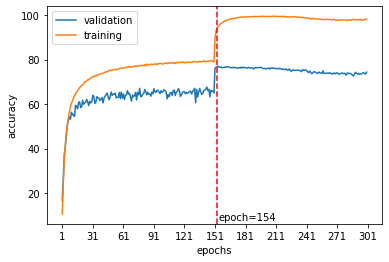

In [ ]:
path = '/content/pytorch-classification/checkpoints/cifar100/densenet-bc-100-12/log.txt'
data = pd.read_csv(path, sep='\t')
sns.lineplot(x=range(1,301), y=data['Valid Acc.'], label='validation')
sns.lineplot(x=range(1,301), y=data['Train Acc.'], label='training')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.xticks(list(range(1,305, 30)))
plt.axvline(153, 0, 70, linestyle='--', color='r')
plt.text(154,8,'epoch=154')

In [ ]:
np.argmax(data['Valid Acc.'])

153

In [ ]:
# Load and transform the test data

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataloader = datasets.CIFAR100
num_classes = 100

testset = dataloader(root='./data', train=False, download=True, transform=transform_test)
testloader = data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Get class names
class_names = testset.classes


Extracting ./data/cifar-100-python.tar.gz to ./data


In [ ]:
# Get model blueprint and load from checkpoint
model = models.__dict__['densenet'](
                    num_classes=100,
                    depth=100,
                    growthRate=12,
                    compressionRate=2,
                    dropRate=0,
                )
model = torch.nn.DataParallel(model).cuda()
checkpoint = torch.load('/content/pytorch-classification/checkpoints/cifar100/densenet-bc-100-12/model_best.pth.tar')
best_acc = checkpoint['best_acc']
print('Validation accuracy: ' + str(best_acc.item()))
model.load_state_dict(checkpoint['state_dict'])

# Get targets and outputs
output_list = []
output_prob_list = []
target_list = []
softmax = Softmax(dim=1)
model.eval()
for batch_idx, (inputs, targets) in enumerate(testloader):
  inputs, targets = inputs.cuda(), targets.cuda()
  inputs, targets = torch.autograd.Variable(inputs, volatile=True), torch.autograd.Variable(targets)
  # compute output
  outputs = softmax(model(inputs)).detach().cpu().numpy()
  output_prob_list.extend(outputs)
  outputs = np.argmax(outputs, axis=1)
  output_list.extend(outputs)
  target_list.extend(targets.detach().cpu().numpy())
print('Correct out of 10000: '+str((np.array(output_list)==np.array(target_list)).sum()))

Validation accuracy: 77.0999984741211


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Correct out of 10000: 7710


Files already downloaded and verified
Actual class: wolf


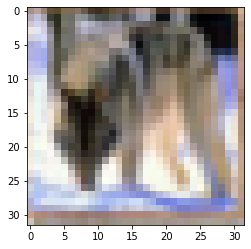

Top 5 predictions:
['wolf' 'raccoon' 'fox' 'bear' 'possum']


In [ ]:
testset_humans = dataloader(root='./data', train=False, download=True, transform=None)
idx = 17
img = np.array(testset_humans[idx][0])
class_names = np.array(testset_humans.classes)
print('Actual class: '+class_names[testset_humans[idx][1]])
plt.imshow(img)
plt.show()
print('Top 5 predictions:')
print(class_names[np.argsort(output_prob_list[idx])[::-1]][:5])

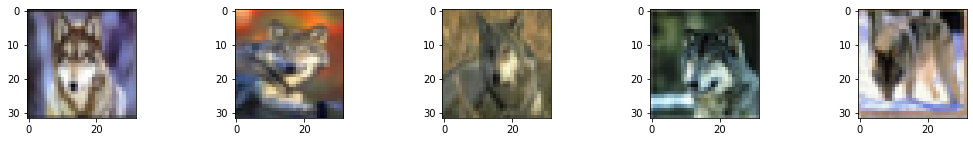

In [ ]:
fig = plt.figure(figsize=(18,2))
indices = [2219, 9768, 8101, 3219, 17]
sub = [151, 152, 153, 154, 155]
for i in range(5):
  img = np.array(testset_humans[indices[i]][0])
  fig.add_subplot(sub[i])
  plt.imshow(img)

In [ ]:
a = np.array().mean(axis=0)
b = [1, 2, 3, 4, 5]
np.corrcoef(a,b)

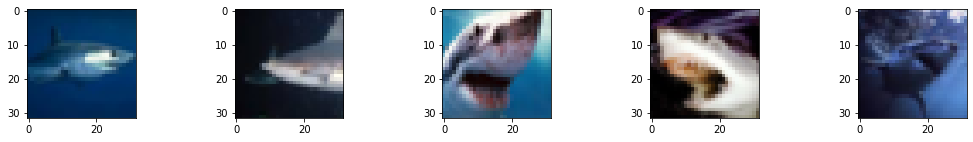

In [ ]:
fig = plt.figure(figsize=(18,2))
indices = [9717, 6613, 2280, 3890, 8771]
sub = [151, 152, 153, 154, 155]
for i in range(5):
  img = np.array(testset_humans[indices[i]][0])
  fig.add_subplot(sub[i])
  plt.imshow(img)

In [ ]:
a = np.array().mean(axis=0)
b = [1, 2, 3, 4, 5]
np.corrcoef(a,b)

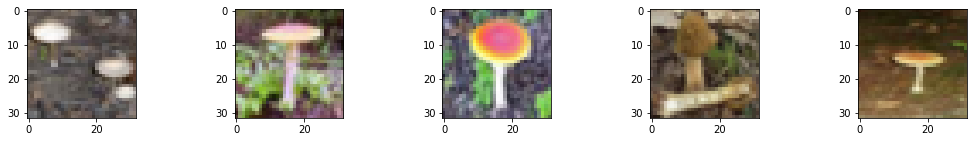

In [ ]:
fig = plt.figure(figsize=(18,2))
indices = [3684, 6911, 1484, 7229, 433]
sub = [151, 152, 153, 154, 155]
for i in range(5):
  img = np.array(testset_humans[indices[i]][0])
  fig.add_subplot(sub[i])
  plt.imshow(img)

In [ ]:
a = np.array().mean(axis=0)
b = [1, 2, 3, 4, 5]
np.corrcoef(a,b)

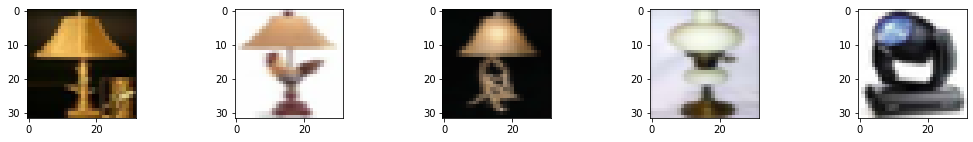

In [ ]:
fig = plt.figure(figsize=(18,2))
indices = [2049, 14, 4166, 1910, 8060]
sub = [151, 152, 153, 154, 155]
for i in range(5):
  img = np.array(testset_humans[indices[i]][0])
  fig.add_subplot(sub[i])
  plt.imshow(img)

In [ ]:
a = np.array().mean(axis=0)
b = [1, 2, 3, 4, 5]
np.corrcoef(a,b)

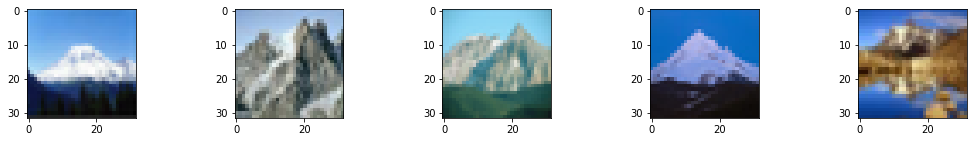

In [ ]:
fig = plt.figure(figsize=(18,2))
indices = [8373, 3243, 3774, 4088, 8456]
sub = [151, 152, 153, 154, 155]
for i in range(5):
  img = np.array(testset_humans[indices[i]][0])
  fig.add_subplot(sub[i])
  plt.imshow(img)

In [ ]:
a = np.array().mean(axis=0)
b = [1, 2, 3, 4, 5]
np.corrcoef(a,b)

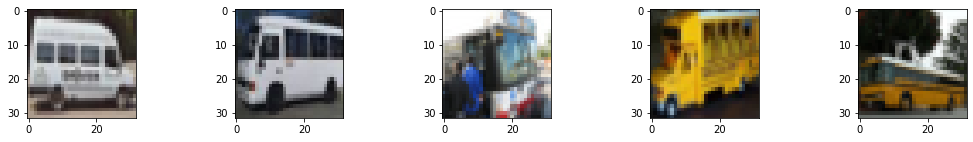

In [ ]:
fig = plt.figure(figsize=(18,2))
indices = [7816, 7441, 1143, 766, 4129]
sub = [151, 152, 153, 154, 155]
for i in range(5):
  img = np.array(testset_humans[indices[i]][0])
  fig.add_subplot(sub[i])
  plt.imshow(img)

In [ ]:
a = np.array().mean(axis=0)
b = [1, 2, 3, 4, 5]
np.corrcoef(a,b)

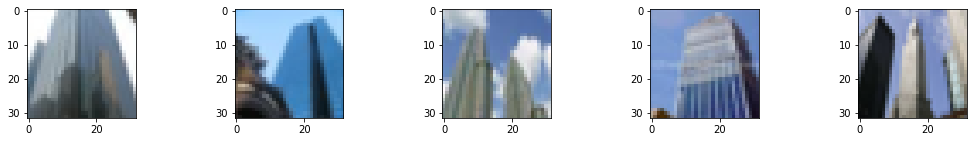

In [ ]:
fig = plt.figure(figsize=(18,2))
indices = [1104, 8600, 2539, 9055, 8798]
sub = [151, 152, 153, 154, 155]
for i in range(5):
  img = np.array(testset_humans[indices[i]][0])
  fig.add_subplot(sub[i])
  plt.imshow(img)

In [ ]:
a = np.array().mean(axis=0)
b = [1, 2, 3, 4, 5]
np.corrcoef(a,b)

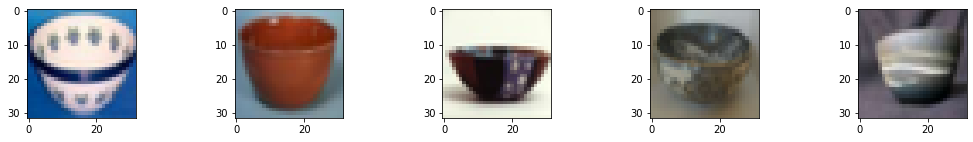

In [ ]:
fig = plt.figure(figsize=(18,2))
indices = [9492, 4520, 588, 6804, 6069]
sub = [151, 152, 153, 154, 155]
for i in range(5):
  img = np.array(testset_humans[indices[i]][0])
  fig.add_subplot(sub[i])
  plt.imshow(img)

In [ ]:
class_idx = np.where(class_names=='cloud')[0][0]
data_idx = np.where(np.array(target_list)==class_idx)[0]
data_idx[np.argsort(np.array(output_prob_list)[data_idx][:, class_idx])[::-1]]

array([8215, 6188, 7910, 3928, 1354, 1890, 3595, 5023, 9641, 2307,  935,
       8703,  801, 3555, 9199, 5652, 7402, 4777, 7072, 7191, 3678, 4920,
       3205, 7931, 6003, 1606,  944, 9571, 9545,  139, 7970, 3414, 9765,
        240, 9664, 5567, 2447, 1086, 7479, 6781, 5641, 6107, 3938, 1066,
       7699, 3572, 2991, 4207, 2999, 6240, 9634, 7103, 6892, 4858, 3159,
       2664, 5951, 2538, 9164, 1393, 3494, 4647, 4782, 6739, 8696, 1237,
       8007, 8466, 9084, 5952, 6259, 1551, 2881, 2407, 9077, 1134,  205,
       8760, 2524, 3457, 7332, 8495, 6187, 7532, 3977, 5134, 6345, 2500,
       9905, 6635, 7565,    8, 9106, 3088, 3007, 2491, 2474,  940, 8854,
       5442])

In [ ]:
# Category Typicality
# for 7 class types
  # for 5 images of 1 class type
  # get human ranks and average them
  # get ML model ranks (maybe add another model too)
  # get correlation for that class type

# Noise response
# for 3 noise types and 3 distortions per type (9)
  # for 4 images
  # get human ranks
  # get ML model ranks (maybe add another model too)
  # get correlation for that class type

In [ ]:
# for noise response, give some figures at every noise level:
# overall validation accuracy
# entropy of response distribution

# remaining tasks: entropy plots and in-group confusion matrices